# DATA

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Jash1005/MACHINE-LEARNING/refs/heads/main/KNN/breast-cancer.csv')

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
print(len(df.columns))

32


In [ ]:
from sklearn.model_selection import train_test_split

df = df.drop('id',axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
helper = df.iloc[0].drop('diagnosis')

X_train,X_test,y_train,y_test = train_test_split(df.drop('diagnosis',axis=1),df['diagnosis'],test_size=0.2,random_state=42)

input_features = helper.index.tolist()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [ ]:
df1 = df.drop('diagnosis',inplace=False,axis=1)
input_data = df1.iloc[[5]]

print(input_data)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
5        12.45          15.7           82.57      477.1           0.1278   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
5              0.17          0.1578              0.08089         0.2087   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
5                 0.07613  ...         15.47          23.75            103.4   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
5       741.6            0.1791             0.5249           0.5355   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
5                0.1741          0.3985                   0.1244  

[1 rows x 30 columns]


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_values = []
k_values = range(1,20)

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_values.append(accuracy)


best_k = k_values[accuracy_values.index(max(accuracy_values))]

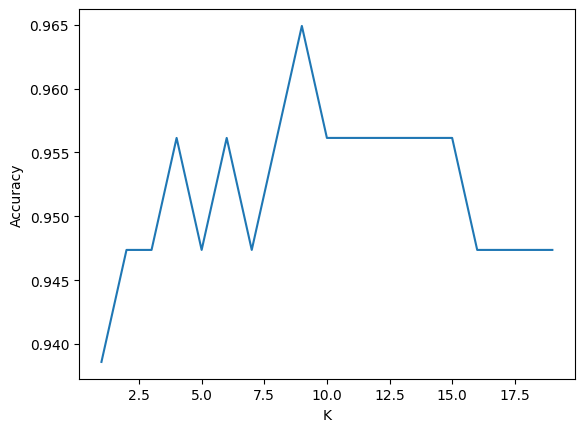

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,20),accuracy_values)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

# Assume you already have:
# - `df`: original dataset with 'diagnosis'
# - `features_kept`: list of features used to train the model
# - `scaler`: fitted scaler used on training data
# - `knn`: trained KNeighborsClassifier model

# ================================
# Predict Function
# ================================

def KNN_prediction(input_df_row):
    # Check for missing values
    if input_df_row.isnull().values.any():
        missing = input_df_row.columns[input_df_row.isnull().any()].tolist()
        print(f"Warning: Missing features: {missing}")
        # Optional: fill missing with training means or handle otherwise
        # input_df_row.fillna(training_mean_dict, inplace=True)

    # Scale the input row
    scaled_input = scaler.transform(input_df_row)

    # Predict
    prediction = knn.predict(scaled_input)
    return prediction[0]

# ================================
# Run Prediction
# ================================

print("\nPrepared input row for prediction:")
print(input_df)



Prepared input row for prediction:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.0254          0.35          0.2145    0.25896             0.54   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.065           0.089               0.0478        0.01452   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                     0.5  ...        0.1542          0.036             0.32   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       0.214            0.0125              0.014           0.0152   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0               0.01457          0.0987                   0.1401  

[1 rows x 30 columns]


In [ ]:
accuracy_knn = accuracy_score(y_test,y_pred)

print(accuracy)

0.9473684210526315


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
accuracy_logistic_regression = accuracy_score(y_test, y_pred)

print(accuracy_logistic_regression)

def logistic_reg_prediction(sample):
   return logreg.predict(sample)

0.9649122807017544


# GRADIENT BOOSTING

In [ ]:
# Get the training indices used in train_test_split
# X_train_indices = X_train.index # This line causes the error

# X_train was converted to a numpy array by the scaler.
# We need to get the original index from before scaling.

# We will recreate X_train as a pandas DataFrame with the original index.
# The scaling was applied to the numpy array, so we use the scaled array data.

training_data = pd.DataFrame(X_train, index=y_train.index, columns=df.drop('diagnosis', axis=1).columns)

# Pull the corresponding rows from df
# This line is now trying to assign a Series (df.loc) with indices to a new column in X_train.
# Since X_train now has the correct index, this assignment should work as intended.
training_data['diagnosis'] = df.loc[training_data.index, 'diagnosis']

# The rest of your code should now work.

In [ ]:
# Count the number of ones and zeroes in the y_train Series
# Use value_counts() and access the counts using .get() with a default of 0 in case a value is missing
import math

ones = y_train.value_counts().get(1, 0)
zeroes = y_train.value_counts().get(0, 0)

log_odds = math.log(ones/zeroes)

training_data['log-odds'] = log_odds

print(log_odds)

-0.5260930958967791


In [ ]:
# we can't predict from this so we will convert this into probability
import math

prob_1 = 1 / (1 + math.exp(-log_odds))

print(prob_1)

0.3714285714285714


In [ ]:
training_data['prob_1'] = prob_1;

training_data['res_1'] = training_data['diagnosis'] - training_data['prob_1']

print(training_data['res_1'].head())

print(training_data['res_1'].nunique())

68    -0.371429
181    0.628571
63    -0.371429
248   -0.371429
60    -0.371429
Name: res_1, dtype: float64
2


 **Fit a Regression Tree **

In [ ]:
from sklearn.tree import DecisionTreeRegressor

y_2 = training_data['res_1']

print(training_data.columns)

# Train regression tree on residuals
reg2 = DecisionTreeRegressor(max_depth=3)  # You can tune depth
X2 = training_data.drop(columns=['diagnosis', 'prob_1', 'res_1','log-odds'])
X2.columns = X2.columns.astype(str)
reg2.fit(X2, y_2)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis', 'log-odds',
       'prob_1', 'res_1'],
      dtype='object')


DecisionTreeRegressor(max_depth=3)

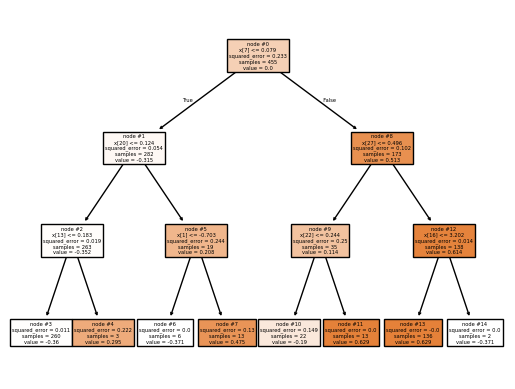

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(reg2,filled=True, node_ids=True)
plt.show()

In [ ]:
leaf_ids_2 = reg2.apply(X2)

# Add leaf assignment to X_train
training_data['leaf_id_2'] = leaf_ids_2

In [ ]:
# Compute the numerator for each row
training_data['leaf_contrib_2'] = training_data['res_1'] / (training_data['prob_1'] * (1 - training_data['prob_1']))

# Group by leaf_id and sum contributions
leaf_values = training_data.groupby('leaf_id_2')['leaf_contrib_2'].sum()

# Convert to dictionary (this is your map)
leaf_value_map_2 = leaf_values.to_dict()

# Map back to training_data
training_data['leaf_value_2'] = training_data['leaf_id_2'].map(leaf_value_map_2)

# Compute new predictions (log-odds update)
training_data['pred_2'] = training_data['log-odds'] + 0.1 * training_data['leaf_value_2']


In [ ]:
training_data['prob_2'] = 1 / (1 + np.exp(-training_data['pred_2']))

#new residual
training_data['res_2'] = training_data['diagnosis'] - training_data['prob_2']

In [ ]:
# Convert probability to predicted class (0 or 1)
training_data['pred_class_2'] = (training_data['prob_2'] >= 0.5).astype(int)

# Count how many are 1s and 0s
prediction_counts = training_data['pred_class_2'].value_counts()

print("Predicted class distribution:\n", prediction_counts)

Predicted class distribution:
 pred_class_2
0    293
1    162
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeRegressor

y_3 = training_data['res_2']

print(training_data.columns)

# Train regression tree on residuals
reg3 = DecisionTreeRegressor(max_depth=3)  # You can tune depth
X3 = training_data.drop(columns=['diagnosis', 'log-odds',
       'prob_1', 'res_1', 'leaf_id_2', 'leaf_contrib_2', 'leaf_value_2',
       'pred_2', 'prob_2', 'res_2', 'pred_class_2'])
X3.columns = X3.columns.astype(str)
reg3.fit(X3, y_3)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis', 'log-odds',
       'prob_1', 'res_1', 'leaf_id_2', 'leaf_contrib_2', 'leaf_value_2',
       'pred_2', 'prob_2', 'res_2', 'pred_class_2'],
      dtype='object')


DecisionTreeRegressor(max_depth=3)

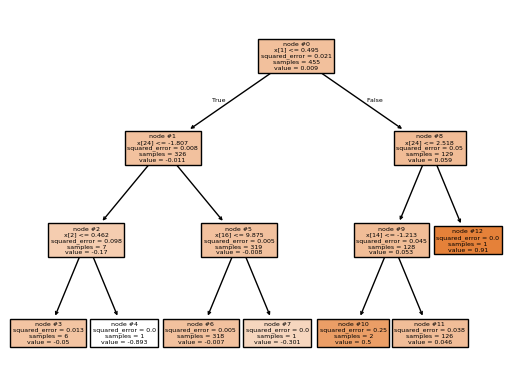

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(reg3,filled=True, node_ids=True)
plt.show()

In [ ]:
leaf_ids_3 = reg3.apply(X3)

# Add leaf assignment to X_train
training_data['leaf_id_3'] = leaf_ids_3

In [ ]:
# Step 1: Compute the numerator for each row (already done)
training_data['leaf_contrib_3'] = training_data['res_2'] / (training_data['prob_2'] * (1 - training_data['prob_2']))

# Step 2: Group by leaf_id_3 and sum contributions (already done)
leaf_values = training_data.groupby('leaf_id_3')['leaf_contrib_3'].sum()

# Convert to dictionary (this is your map)
leaf_value_map_3 = leaf_values.to_dict()

# Step 3: Map leaf_values back to X_train based on leaf_id_3
training_data['leaf_value_3'] = training_data['leaf_id_3'].map(leaf_values)

# Step 4: Use these values for prediction
training_data['pred_3'] = training_data['log-odds'] + 0.1 * training_data['leaf_value_2'] + 0.1 * training_data['leaf_value_3']


In [ ]:
training_data['prob_3'] = 1 / (1 + np.exp(-training_data['pred_3']))

#new residual
training_data['res3'] = training_data['prob_2'] - training_data['prob_3']

In [ ]:
# Convert probability to predicted class (0 or 1)
training_data['pred_class_3'] = (training_data['prob_3'] >= 0.5).astype(int)

# Count how many are 1s and 0s
prediction_counts = training_data['pred_class_3'].value_counts()

print("Predicted class distribution:\n", prediction_counts)

Predicted class distribution:
 pred_class_3
0    255
1    200
Name: count, dtype: int64


In [ ]:
#calculating accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(training_data['diagnosis'],training_data['pred_class_3'])

print("Accuracy:", accuracy)


Accuracy: 0.8703296703296703


In [ ]:
# Assume input_df contains the 30 original features as a pandas DataFrame
# Assume scaler is the StandardScaler fitted on the training data
# Assume log_odds is the calculated log-odds from the training data

import numpy as np
import pandas as pd # Ensure pandas is imported

def GBT_prediction(input_df):
    # 1. Scale the input data using the fitted scaler
    # scaler.transform expects a 2D array-like, input_df is already a DataFrame
    scaled_input = scaler.transform(input_df)

    # 2. Convert scaled_input back to a DataFrame to handle feature names
    # Use the original input feature names for this DataFrame
    scaled_input_df = pd.DataFrame(scaled_input, columns=input_df.columns)


    # Apply regressors to the correctly formatted input
    leaf_ids_2 = reg2.apply(scaled_input_df)
    leaf_ids_3 = reg3.apply(scaled_input_df)

    # 6. Map leaf IDs to values using the pre-computed maps
    # Ensure the index of leaf_ids_2 and leaf_ids_3 matches the index of input_df
    # Since we started with input_df and built upon it, the index should be preserved.
    model2_output = pd.Series(leaf_ids_2).map(leaf_value_map_2).values # Get values as numpy array
    model3_output = pd.Series(leaf_ids_3).map(leaf_value_map_3).values # Get values as numpy array


    # Combine predictions in log-odds space
    # Note: log_odds is a single scalar value calculated from training data
    # We need to add it to each prediction. The mapped tree outputs are arrays.
    # log_odds + 0.1 * model2_output + 0.1 * model3_output already handles broadcasting if model_outputs are arrays
    final_log_odds = -0.5260930958967791 + 0.1 * model2_output + 0.1 * model3_output

    # Convert log-odds to probability
    prob = 1 / (1 + np.exp(-final_log_odds))

    # Return binary prediction as a single value if input_df was a single row,
    # or as an array if input_df had multiple rows.
    # Since input_df in this case is a single row, we return the first element.
    return (prob >= 0.5).astype(int)[0] # [0] to return a single integer

# SVM

**TRYING WITH HARD MARGIN SVM**

In [ ]:
from sklearn.svm import SVC

svc1 = SVC(kernel='linear', C=1e10)
svc1.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = svc1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9385964912280702


Finding Best C

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV with cross-validation
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best hyperparameter from training cross-validation
print("Best C (from CV):", grid.best_params_['C'])
print("Best cross-validated accuracy:", grid.best_score_)

# Now test the best model on test set
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy with best C:", test_accuracy)


Best C (from CV): 1
Best cross-validated accuracy: 0.9758241758241759
Test set accuracy with best C: 0.9824561403508771


TRYING WITH SOFT SVM

In [ ]:
# Soft SVM with a soft margin (smaller C)
svc2 = SVC(kernel='linear', C=0.1)
svc2.fit(X_train, y_train)

y_pred = svc2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9824561403508771


In [ ]:
# Soft SVM with a soft margin (smaller C)
svc3 = SVC(kernel='linear', C=1)
svc3.fit(X_train, y_train)

y_pred = svc3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [ ]:
def SVM_prediction(input_df):
   hard_prediction = svc1.predict(input_df)
   soft_prediction = svc3.predict(input_df)
   return hard_prediction, soft_prediction

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [ ]:
# Built-in feature importance (Gini Importance)
importances = rf.feature_importances_

# Get the original column names from the DataFrame before scaling
# Remember that 'df' has already had 'id' dropped and 'diagnosis' mapped
feature_names = df.drop('diagnosis', axis=1).columns

feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
print(feature_imp_df)

                    Feature  Gini Importance
23               area_worst         0.153892
27     concave points_worst         0.144663
7       concave points_mean         0.106210
20             radius_worst         0.077987
6            concavity_mean         0.068001
22          perimeter_worst         0.067115
2            perimeter_mean         0.053270
0               radius_mean         0.048703
3                 area_mean         0.047555
26          concavity_worst         0.031802
13                  area_se         0.022407
21            texture_worst         0.021749
25        compactness_worst         0.020266
10                radius_se         0.020139
5          compactness_mean         0.013944
1              texture_mean         0.013591
12             perimeter_se         0.011303
24         smoothness_worst         0.010644
28           symmetry_worst         0.010120
16             concavity_se         0.009386
4           smoothness_mean         0.007285
19     fra

In [ ]:
features_to_drop = [
    'concave points_se',
    'symmetry_mean',
    'fractal_dimension_mean',
    'symmetry_se',
    'smoothness_se',
    'texture_se',
    'fractal_dimension_worst',
    'compactness_se',
    'fractal_dimension_se',
    'smoothness_mean'
]


# Find the indices of the features to drop
indices_to_drop = [feature_names.get_loc(col) for col in features_to_drop if col in feature_names]

X_train = np.delete(X_train, indices_to_drop, axis=1)
X_test = np.delete(X_test, indices_to_drop, axis=1)

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100, random_state=42,bootstrap = True)
rf2.fit(X_train, y_train)

y_pred = rf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [ ]:
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd # Make sure pandas is imported if not already

# ... (previous code including feature dropping) ...

# After dropping features, update feature_names to reflect the current columns
# We need the column names corresponding to the columns *remaining* in X_train/X_test
# Since we don't have the original column names directly tied to the numpy array
# after dropping, we'll need to recreate a list of the current feature names.
# This assumes the order of columns in X_train matches the order in the original df
# minus the dropped columns.

# Get the original feature names before any dropping
original_feature_names = df.drop('diagnosis', axis=1).columns.tolist()

# Find the names of the features that were *not* dropped
features_kept = [name for i, name in enumerate(original_feature_names) if i not in indices_to_drop]

# Update feature_names to use for random selection
feature_names = features_kept

best_accuracy = 0
best_feature_set = []
best_run_info = {}
results = []

num_runs = 100  # Number of random combinations to test
min_features = 5  # minimum number of features to sample
max_features = len(feature_names)  # maximum number of features

for run in range(num_runs):
    # 1. Randomly select number of features to keep from the UPDATED feature_names
    # Check if max_features is valid after potential filtering
    if max_features < min_features:
        print(f"Warning: Maximum number of features ({max_features}) is less than minimum ({min_features}). Skipping run.")
        continue

    # Handle the case where min_features equals max_features
    if min_features == max_features:
        n_features = min_features
        selected_features = list(feature_names) # Select all remaining features
    else:
        n_features = random.randint(min_features, max_features)
        selected_features = random.sample(list(feature_names), n_features)

    # 2. Get the indices of selected features in the *current* X_train/X_test array
    # Now, use the index of the selected feature within the 'features_kept' list
    indices_to_keep = [features_kept.index(col) for col in selected_features]

    # 3. Randomly sample rows (bootstrap sampling with replacement)
    n_rows = X_train.shape[0]
    bootstrap_indices = np.random.choice(n_rows, size=n_rows, replace=True)
    # Slicing based on row indices first, then column indices
    X_train_bootstrap = X_train[bootstrap_indices][:, indices_to_keep]

    # Use .iloc for positional indexing when selecting rows from the y_train Series
    y_train_bootstrap = y_train.iloc[bootstrap_indices]


    # 4. Select the same columns in test data
    X_test_subset = X_test[:, indices_to_keep]

    # 5. Train model
    # Ensure the random state is set for reproducibility if needed within the loop
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Or use a different seed for each run
    rf_model.fit(X_train_bootstrap, y_train_bootstrap)

    # 6. Predict and evaluate
    y_pred = rf_model.predict(X_test_subset)
    acc = accuracy_score(y_test, y_pred)

    # 7. Store result
    results.append({
        'Run': run + 1,
        'Num_Features': n_features,
        'Selected_Features': selected_features,
        'Accuracy': acc
    })

    if acc > best_accuracy:
        best_accuracy = acc
        best_feature_set = selected_features
        best_run_info = {
            'run': run + 1,
            'n_features': n_features,
            'accuracy': acc
        }

# --- Print Results ---
print("\n--- Top 10 Results ---")
# Ensure results is not empty before sorting
if results:
    top_results = sorted(results, key=lambda x: x['Accuracy'], reverse=True)[:10]
    for r in top_results:
        print(f"Run {r['Run']}: Features={r['Num_Features']}, Accuracy={r['Accuracy']:.4f}, Features={r['Selected_Features']}")
else:
    print("No results were recorded.")


# --- Best Result ---
print("\n--- Best Random Subset Result ---")
if best_run_info:
    print(f"Run #{best_run_info['run']} with {best_run_info['n_features']} features")
    print(f"Best Accuracy: {best_accuracy:.4f}")
    print("Best Feature Set:", best_feature_set)
else:
     print("No best result found.")


--- Top 10 Results ---
Run 56: Features=16, Accuracy=0.9912, Features=['radius_se', 'area_se', 'compactness_mean', 'radius_worst', 'concave points_mean', 'perimeter_worst', 'texture_worst', 'concavity_worst', 'area_worst', 'compactness_worst', 'perimeter_mean', 'radius_mean', 'concavity_se', 'smoothness_worst', 'perimeter_se', 'texture_mean']
Run 48: Features=9, Accuracy=0.9825, Features=['compactness_worst', 'perimeter_mean', 'smoothness_worst', 'radius_se', 'concavity_worst', 'perimeter_worst', 'texture_worst', 'radius_worst', 'concavity_mean']
Run 57: Features=8, Accuracy=0.9825, Features=['radius_se', 'area_mean', 'smoothness_worst', 'texture_worst', 'concave points_worst', 'symmetry_worst', 'texture_mean', 'area_se']
Run 68: Features=15, Accuracy=0.9825, Features=['texture_worst', 'area_se', 'compactness_mean', 'symmetry_worst', 'area_worst', 'perimeter_mean', 'radius_se', 'concavity_mean', 'texture_mean', 'concavity_worst', 'smoothness_worst', 'concave points_worst', 'perimeter_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np # Make sure numpy is imported

# Assume best_feature_set and features_kept are available from the previous cell
# Example (replace with your actual best_feature_set from the previous output):
# best_feature_set = ['radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'texture_worst']

# Find the indices of the features in the best_feature_set within the features_kept list
# This assumes features_kept is the list of column names remaining *after* the initial drop
indices_of_best_features = [features_kept.index(col) for col in best_feature_set if col in features_kept]

# Subset the X_train and X_test numpy arrays using these indices
X_train_best_features = X_train[:, indices_of_best_features]
X_test_best_features = X_test[:, indices_of_best_features]

# Train a new Random Forest model using the best feature subset
rf_best = RandomForestClassifier(n_estimators=100, random_state=42) # Using the same parameters as before
rf_best.fit(X_train_best_features, y_train) # Use the full y_train

# Predict on the test set using the subsetted test data
y_pred_best = rf_best.predict(X_test_best_features)

# Evaluate the accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best)

print(f"\nTraining Random Forest with Best Feature Subset ({len(best_feature_set)} features):")
print("Selected Features:", best_feature_set)
print(f"Accuracy on Test Set: {accuracy_best_rf:.4f}")


Training Random Forest with Best Feature Subset (16 features):
Selected Features: ['radius_se', 'area_se', 'compactness_mean', 'radius_worst', 'concave points_mean', 'perimeter_worst', 'texture_worst', 'concavity_worst', 'area_worst', 'compactness_worst', 'perimeter_mean', 'radius_mean', 'concavity_se', 'smoothness_worst', 'perimeter_se', 'texture_mean']
Accuracy on Test Set: 0.9649


In [ ]:
def RF_prediction(input_df):
    # Use .iloc to select columns by integer position
    # input_df is a DataFrame, indices_of_best_features is a list of integers
    input_df_best_feature = input_df.iloc[:, indices_of_best_features]
    # The predict method expects a 2D array-like input, which the subsetted DataFrame provides
    predicted_class = rf_best.predict(input_df_best_feature)
    return predicted_class

# INPUT DATA

In [ ]:
input_values = [
    0.0254,  # radius_mean
    0.35,    # texture_mean
    0.2145,  # perimeter_mean
    0.25896, # area_mean
    0.54,    # smoothness_mean
    0.065,   # compactness_mean
    0.089,   # concavity_mean
    0.0478,  # concave points_mean
    0.01452, # symmetry_mean
    0.5,     # fractal_dimension_mean
    0.236,   # radius_se
    0.14,    # texture_se
    0.015,   # perimeter_se
    0.015,   # area_se
    0.265,   # smoothness_se
    0.0351,  # compactness_se
    0.14,    # concavity_se
    0.01562, # concave points_se
    0.12,    # symmetry_se
    0.54,    # fractal_dimension_se
    0.1542,  # radius_worst
    0.036,   # texture_worst
    0.32,    # perimeter_worst
    0.214,   # area_worst
    0.0125,  # smoothness_worst
    0.014,   # compactness_worst
    0.0152,  # concavity_worst
    0.0145698, # concave points_worst
    0.0987,  # symmetry_worst
    0.1401   # fractal_dimension_worst
]


In [ ]:
# Assuming features_kept is already defined and has 30 features
# You can now create the input dictionary
input_data = dict(zip(input_features, input_values))

# Convert to DataFrame in the correct order
input_df = pd.DataFrame([input_data], columns=input_features)

# Optional: print the input DataFrame
print("\nPrepared input row for prediction:")
print(input_df)



Prepared input row for prediction:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.0254          0.35          0.2145    0.25896             0.54   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.065           0.089               0.0478        0.01452   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                     0.5  ...        0.1542          0.036             0.32   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       0.214            0.0125              0.014           0.0152   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0               0.01457          0.0987                   0.1401  

[1 rows x 30 columns]


In [ ]:
print(input_df)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.0254          0.35          0.2145    0.25896             0.54   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.065           0.089               0.0478        0.01452   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                     0.5  ...        0.1542          0.036             0.32   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       0.214            0.0125              0.014           0.0152   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0               0.01457          0.0987                   0.1401  

[1 rows x 30 columns]


In [ ]:
knn_prediction_result = KNN_prediction(input_data)
print("\nPrediction Result:", knn_prediction_result)


Prediction Result: 1


In [ ]:
logistic_reg_prediction_result = logistic_reg_prediction(input_data)
print("\nPrediction Result:", logistic_reg_prediction_result)


Prediction Result: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
random_forest_presdiction_result = RF_prediction(input_data)
print("\nPrediction Result:", random_forest_presdiction_result)


Prediction Result: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
hard_prediction , soft_prediction = SVM_prediction(input_data)
print("\nPrediction Result:", hard_prediction , soft_prediction)


Prediction Result: [1] [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
GBT_prediction_result = GBT_prediction(input_data)
print("\nPrediction Result:", GBT_prediction_result)


Prediction Result: 1
